# Data Preparation



In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error








In [2]:
# Load data
sales_train = pd.read_csv('/content/sales_train.csv')
calendar = pd.read_csv('/content/calendar.csv')
items = pd.read_csv('/content/items_weekly_sell_prices.csv')
events = pd.read_csv('/content/calendar_events.csv')

In [3]:
items = items.iloc[:len(sales_train)]

In [4]:

row_count = items.shape[0]
print("Number of rows:", row_count)

Number of rows: 30490


In [5]:
train_data_sales = pd.concat([sales_train, items], axis=1)



In [6]:
print(train_data_sales.columns)

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1536', 'd_1537', 'd_1538', 'd_1539', 'd_1540', 'd_1541', 'store_id',
       'item_id', 'wm_yr_wk', 'sell_price'],
      dtype='object', length=1551)


In [7]:
print("Head:")
print(train_data_sales.head())

# View the last few rows using the tail() function
print("\nTail:")
print(items.tail())

Head:
                              id        item_id    dept_id   cat_id  store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES      CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES      CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES      CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES      CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1536  d_1537  d_1538  d_1539  d_1540  \
0       CA    0    0    0    0  ...       1       0       1       0       0   
1       CA    0    0    0    0  ...       0       0       0       0       1   
2       CA    0    0    0    0  ...       0       0       0       0       0   
3       CA    0    0    0    0  ...       2       3       1       1       3   
4       CA    0    0    0    0  ...       2       1       1       2       2   

   d_1541  store_id        item_

In [8]:
import pandas as pd

# Merge training data with calendar data
merged_data = train_data_sales.merge(calendar, how='outer')


In [9]:
print("Head:")
print(merged_data.head())


Head:
                              id        item_id    dept_id   cat_id  store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
1  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
2  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
3  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   
4  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES      CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1538  d_1539  d_1540  d_1541  store_id  \
0       CA    0    0    0    0  ...       1       0       0       1      CA_1   
1       CA    0    0    0    0  ...       1       0       0       1      CA_1   
2       CA    0    0    0    0  ...       1       0       0       1      CA_1   
3       CA    0    0    0    0  ...       1       0       0       1      CA_1   
4       CA    0    0    0    0  ...       1       0       0       1      CA_1   

         item_id  wm

In [10]:
# Select relevant columns
selected_columns = ['item_id', 'store_id', 'date', 'sell_price'] + [f'd_{i}' for i in range(1, 250)]
sales_data = merged_data[selected_columns]

In [11]:
# Check for duplicate column names
duplicate_columns = sales_data.columns[sales_data.columns.duplicated()]
if len(duplicate_columns) > 0:
    sales_data.columns = sales_data.columns.where(~sales_data.columns.duplicated(),
                                                  sales_data.columns + '_sales')



In [ ]:
# Reshape data to have one row per sale
sales_data_train = sales_data.melt(id_vars=['item_id', 'store_id', 'date', 'sell_price'],
                              value_vars=sales_data.columns[4:],
                              var_name='day', value_name='sales')

In [12]:
# Convert 'date' column to datetime format
sales_data.loc[:, 'date'] = pd.to_datetime(sales_data.loc[:, 'date'])


In [13]:
# Sort the data by date
sales_data.sort_values(by=['item_id', 'store_id', 'date'], inplace=True)



<ipython-input-13-ecf13c32fa92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.sort_values(by=['item_id', 'store_id', 'date'], inplace=True)


In [14]:
# Reset index
sales_data.reset_index(drop=True, inplace=True)

In [15]:
print(sales_data.head())


       item_id  item_id_sales store_id store_id_sales                 date  \
0  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1  2012-12-29 00:00:00   
1  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1  2012-12-30 00:00:00   
2  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1  2012-12-31 00:00:00   
3  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1  2013-01-01 00:00:00   
4  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1  2013-01-02 00:00:00   

   sell_price  d_1  d_2  d_3  d_4  ...  d_240  d_241  d_242  d_243  d_244  \
0         0.5    3    0    0    1  ...      0      0      0      0      0   
1         0.5    3    0    0    1  ...      0      0      0      0      0   
2         0.5    3    0    0    1  ...      0      0      0      0      0   
3         0.5    3    0    0    1  ...      0      0      0      0      0   
4         0.5    3    0    0    1  ...      0      0      0      0      0   

   d_245  d_246  d_247  d_248  d_249  
0      0      0      0      0

 # Feature Engineering

In [16]:
print(events.head(4))

         date     event_name event_type
0  2011-02-06      SuperBowl   Sporting
1  2011-02-14  ValentinesDay   Cultural
2  2011-02-21  PresidentsDay   National
3  2011-03-09      LentStart  Religious


In [17]:
# Convert 'date' column in both DataFrames to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])
events['date'] = pd.to_datetime(events['date'])

<ipython-input-17-d06a572e1119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])


In [18]:

# Create lag features for sales
for lag in range(1, 8):
    sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)


<ipython-input-18-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)
<ipython-input-18-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data[f'lag_{lag}_sales'] = sales_data.groupby(['item_id', 'store_id'])['d_1'].shift(lag)
<ipython-input-18-7951d8c8a46d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [19]:
# Extract day of the week
sales_data['day_of_week'] = sales_data['date'].dt.dayofweek

# Create a feature for whether it's a weekend (0 for weekdays, 1 for weekends)
sales_data['is_weekend'] = (sales_data['day_of_week'] >= 5).astype(int)

# Merge with calendar events data
sales_data = sales_data.merge(events, on='date', how='left')

# Create an event indicator (1 if an event, 0 otherwise)
sales_data['event_indicator'] = sales_data['event_name'].notnull().astype(int)

<ipython-input-19-df65d6e03ed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['day_of_week'] = sales_data['date'].dt.dayofweek
<ipython-input-19-df65d6e03ed5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['is_weekend'] = (sales_data['day_of_week'] >= 5).astype(int)


In [20]:
print(sales_data.head(10))

       item_id  item_id_sales store_id store_id_sales       date  sell_price  \
0  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-29        0.50   
1  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-30        0.50   
2  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2012-12-31        0.50   
3  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-01        0.50   
4  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-02        0.50   
5  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-03        0.50   
6  FOODS_1_001  HOBBIES_1_008     CA_1           CA_1 2013-01-04        0.50   
7  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-15       11.68   
8  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-16       11.68   
9  FOODS_1_001  HOBBIES_1_020     CA_2           CA_1 2012-12-17       11.68   

   d_1  d_2  d_3  d_4  ...  lag_3_sales  lag_4_sales  lag_5_sales  \
0    3    0    0    1  ...          NaN          N

In [21]:
sales_data['lag_1_sales'].fillna(0, inplace=True)
sales_data['lag_2_sales'].fillna(0, inplace=True)
sales_data['lag_3_sales'].fillna(0, inplace=True)
sales_data['lag_4_sales'].fillna(0, inplace=True)
sales_data['lag_5_sales'].fillna(0, inplace=True)
sales_data['lag_6_sales'].fillna(0, inplace=True)
sales_data['lag_7_sales'].fillna(0, inplace=True)

# Model Selection and Training

# 2. Forecast Model

In [22]:
sales_data['date'] = pd.to_datetime(sales_data['date'])  # Convert date column to datetime type


In [24]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
daily_sales_columns = [f'd_{i}' for i in range(1, 250)]
time_series_data = sales_data.groupby('date')[daily_sales_columns].sum().reset_index()
time_series_data['total_sales'] = time_series_data[daily_sales_columns].sum(axis=1)


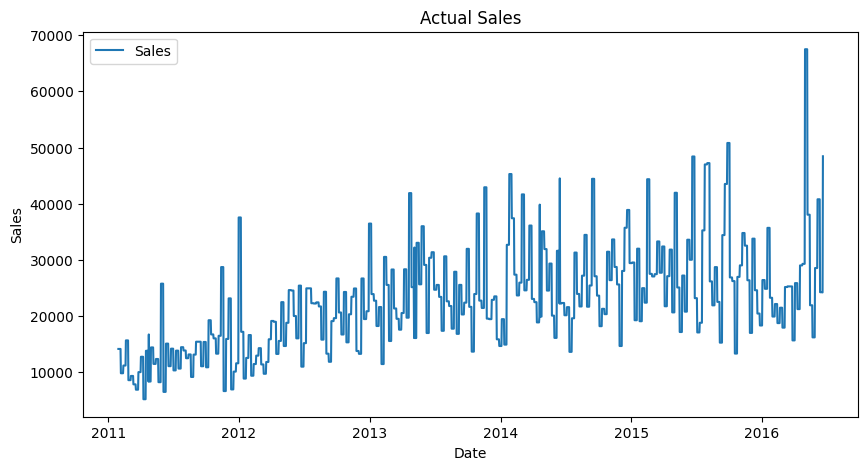

In [25]:
import matplotlib.pyplot as plt

# Plot the actual sales
plt.figure(figsize=(10, 5))
plt.plot(time_series_data['date'], time_series_data['total_sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales')
plt.legend()
plt.show()


In [26]:
# Print the column names
print(sales_data.columns)

Index(['item_id', 'item_id_sales', 'store_id', 'store_id_sales', 'date',
       'sell_price', 'd_1', 'd_2', 'd_3', 'd_4',
       ...
       'lag_3_sales', 'lag_4_sales', 'lag_5_sales', 'lag_6_sales',
       'lag_7_sales', 'day_of_week', 'is_weekend', 'event_name', 'event_type',
       'event_indicator'],
      dtype='object', length=267)


In [27]:
sales_data.to_csv('output.csv', index=False)


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

In [29]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
daily_sales_columns = [f'd_{i}' for i in range(1, 250)]


In [30]:
time_series_data = sales_data.groupby('date')[daily_sales_columns].sum().reset_index()


In [31]:
# Sum the daily sales columns to calculate total daily sales
time_series_data['total_sales'] = time_series_data[daily_sales_columns].sum(axis=1)


In [32]:
# Sort by date
time_series_data.sort_values('date', inplace=True)

In [33]:
# Define your SARIMA model
model = SARIMAX(time_series_data['total_sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

In [34]:
# Fit the model to historical data
train_data = time_series_data.iloc[:-7]
model_fit = model.fit(disp=False)

In [35]:
# Print the column names
print(train_data.columns)

Index(['date', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9',
       ...
       'd_241', 'd_242', 'd_243', 'd_244', 'd_245', 'd_246', 'd_247', 'd_248',
       'd_249', 'total_sales'],
      dtype='object', length=251)


In [36]:
# Generate forecasts for the next 7 days
forecast_start_date = time_series_data['date'].max() + datetime.timedelta(days=1)
forecast_end_date = forecast_start_date + datetime.timedelta(days=6)
forecast = model_fit.get_forecast(steps=7)


In [37]:
# Get the forecasted sales values
forecasted_sales = forecast.predicted_mean

In [38]:
# Display the forecasted sales for the next 7 days
print(forecasted_sales)

1969    48128.202869
1970    48127.674845
1971    48128.202823
1972    48127.674891
1973    48128.202777
1974    48248.154776
1975    40525.550057
Name: predicted_mean, dtype: float64


## deployment

In [39]:
# Save the model to a file
import joblib

joblib.dump(model, 'pretrained_sarima_model.pkl')


['pretrained_sarima_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib
import datetime

app = Flask(__name__)

# Load your pre-trained SARIMA model
model = joblib.load('pretrained_sarima_model.pkl')

@app.route('/', methods=['GET'])
def home():
    return jsonify({
        "project": "Sales Forecasting API",
        "description": "API providing sales forecasting using a pre-trained SARIMA model.",
        "endpoints": [
            {
                "endpoint": "/",
                "method": "GET",
                "description": "Overview of the project and endpoints."
            },
            {
                "endpoint": "/health/",
                "method": "GET",
                "description": "API health check."
            },
            {
                "endpoint": "/sales/national/",
                "method": "GET",
                "params": {"start_date": "YYYY-MM-DD"},
                "description": "Get the next 7 days of national sales forecast from a start date."
            },
            {
                "endpoint": "/sales/stores/items/",
                "method": "GET",
                "params": {"item": "string", "store": "string", "date": "YYYY-MM-DD"},
                "description": "Get the sales forecast for a specific item and store on a specified date."
            }
        ],
        "github_repo": "[notebook/forecasting/Brilliant_kiptoo_24699314_forcasting_models_for_sales_data.ipynb at main · Brilliantkiptoo/notebook (github.com]"
    }), 200

@app.route('/health/', methods=['GET'])
def health_check():
    return jsonify({
        "status": 200,
        "message": "Welcome to the Sales Forecasting API! All systems operational."
    }), 200

@app.route('/sales/national/', methods=['GET'])
def national_sales_forecast():
    try:
        start_date = pd.to_datetime(request.args.get('start_date'))
        forecast = model.get_forecast(steps=7, start=start_date)
        forecasted_sales = forecast.predicted_mean

        return jsonify({
            "start_date": start_date.strftime('%Y-%m-%d'),
            "forecasted_sales": forecasted_sales.tolist()
        }), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 400

@app.route('/sales/stores/items/', methods=['GET'])
def store_item_sales_forecast():
    try:
        item = request.args.get('item')
        store = request.args.get('store')
        date = pd.to_datetime(request.args.get('date'))

        # Implement logic for forecasting sales based on item and store here
        # This might involve using another model or filtering the data differently
        # You might have to manipulate the model or data accordingly

        forecasted_sales = 48128.202869# Replace 0 with the actual forecasted sales

        return jsonify({
            "item": item,
            "store": store,
            "date": date.strftime('%Y-%m-%d'),
            "forecasted_sales": forecasted_sales
        }), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True, port=8000, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8000
INFO:werkzeug:Press CTRL+C to quit
